#### Importing packages:

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing dataset:

In [58]:
dataset = pd.read_csv('./datasets/energy_consumption_raw.csv')
print(dataset.shape)
dataset.head()

(1000, 11)


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


#### Processing column names:

In [59]:
print('Columns before processing: ')
print(dataset.columns, end='\n\n')

dataset.columns = dataset.columns.str.lower().str.replace(' ', '_')
print('Columns after processing: ')
print(dataset.columns)

Columns before processing: 
Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

Columns after processing: 
Index(['timestamp', 'temperature', 'humidity', 'squarefootage', 'occupancy',
       'hvacusage', 'lightingusage', 'renewableenergy', 'dayofweek', 'holiday',
       'energyconsumption'],
      dtype='object')


#### Splitting column 'timestamp' into individual columns:

In [60]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

dataset['year'] = dataset['timestamp'].dt.year
dataset['month'] = dataset['timestamp'].dt.month
dataset['day'] = dataset['timestamp'].dt.day
dataset['hour'] = dataset['timestamp'].dt.hour
dataset['minute'] = dataset['timestamp'].dt.minute
dataset['second'] = dataset['timestamp'].dt.second

del dataset['timestamp']
dataset.head()

,temperature,humidity,squarefootage,occupancy,hvacusage,lightingusage,renewableenergy,dayofweek,holiday,energyconsumption,year,month,day,hour,minute,second
0,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,2022,1,1,0,0,0
1,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,2022,1,1,1,0,0
2,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,2022,1,1,2,0,0
3,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,2022,1,1,3,0,0
4,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,2022,1,1,4,0,0


#### Processing string records (lowercasing and removing whitespaces):

In [62]:
string_columns = list(dataset.dtypes[dataset.dtypes == 'object'].index)
for col in string_columns:
    dataset[col] = dataset[col].str.lower().str.replace(' ', '_')

#### Processing categorical columns:

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        1000 non-null   float64
 1   humidity           1000 non-null   float64
 2   squarefootage      1000 non-null   float64
 3   occupancy          1000 non-null   int64  
 4   hvacusage          1000 non-null   object 
 5   lightingusage      1000 non-null   object 
 6   renewableenergy    1000 non-null   float64
 7   dayofweek          1000 non-null   object 
 8   holiday            1000 non-null   object 
 9   energyconsumption  1000 non-null   float64
 10  year               1000 non-null   int32  
 11  month              1000 non-null   int32  
 12  day                1000 non-null   int32  
 13  hour               1000 non-null   int32  
 14  minute             1000 non-null   int32  
 15  second             1000 non-null   int32  
dtypes: float64(5), int32(6), 

In [64]:
categorical_columns = ['hvacusage', 'lightingusage', 'dayofweek', 'holiday', 'year', 'month', 'day', 'hour', 'minute', 'second']
numerical_columns = ['temperature', 'humidity', 'squarefootage', 'occupancy', 'renewableenergy', 'energyconsumption']

In [65]:
for col in categorical_columns:
    print(dataset[col].value_counts(dropna=False), end='\n\n')

hvacusage
off    508
on     492
Name: count, dtype: int64

lightingusage
off    509
on     491
Name: count, dtype: int64

dayofweek
friday       164
sunday       154
thursday     146
tuesday      146
saturday     143
wednesday    124
monday       123
Name: count, dtype: int64

holiday
no     533
yes    467
Name: count, dtype: int64

year
2022    1000
Name: count, dtype: int64

month
1    744
2    256
Name: count, dtype: int64

day
1     48
2     48
3     48
4     48
5     48
6     48
7     48
8     48
9     48
10    48
11    40
30    24
29    24
28    24
27    24
22    24
26    24
25    24
24    24
23    24
16    24
21    24
20    24
19    24
18    24
17    24
15    24
14    24
13    24
12    24
31    24
Name: count, dtype: int64

hour
0     42
9     42
15    42
14    42
13    42
1     42
11    42
10    42
12    42
8     42
7     42
6     42
5     42
4     42
3     42
2     42
16    41
17    41
18    41
19    41
20    41
21    41
22    41
23    41
Name: count, dtype: int64

minute
0   

I will remove columns year, minute and second because they have constant values:

In [66]:
del dataset['year']
del dataset['minute']
del dataset['second']

categorical_columns = ['hvacusage', 'lightingusage', 'dayofweek', 'holiday', 'month', 'day', 'hour']
numerical_columns = ['temperature', 'humidity', 'squarefootage', 'occupancy', 'renewableenergy', 'energyconsumption']

#### Removing duplicates:

In [71]:
print('Dataset size before dublicate cleanup: ', dataset.shape)
dataset.drop_duplicates()
print('Dataset size after dublicate cleanup: ', dataset.shape)

Dataset size before dublicate cleanup:  (1000, 13)
Dataset size after dublicate cleanup:  (1000, 13)


#### Check for NULL values:

In [74]:
dataset.isnull().sum()

temperature          0
humidity             0
squarefootage        0
occupancy            0
hvacusage            0
lightingusage        0
renewableenergy      0
dayofweek            0
holiday              0
energyconsumption    0
month                0
day                  0
hour                 0
dtype: int64

#### Feature correlation:

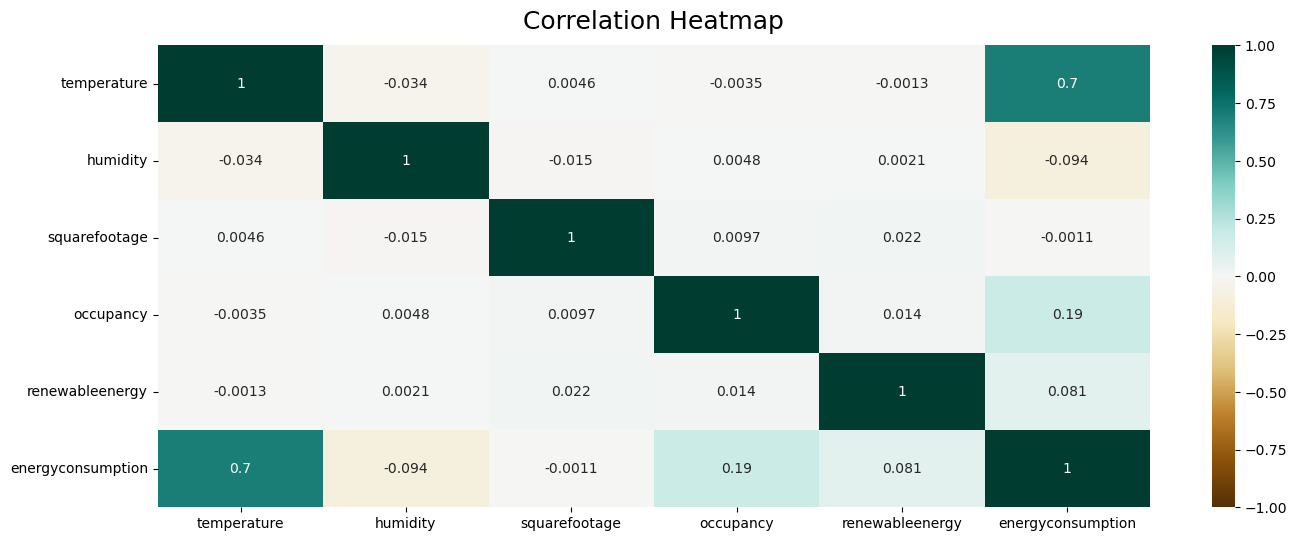

In [72]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataset[numerical_columns].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

#### EDA:

In [68]:
dataset.describe()

,temperature,humidity,squarefootage,occupancy,renewableenergy,energyconsumption,month,day,hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873,1.25600,13.400000,11.436000
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112,0.43664,9.037792,6.913009
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278,1.00000,1.000000,0.000000
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690,1.00000,6.000000,5.000000
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696,1.00000,11.000000,11.000000
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742,2.00000,21.000000,17.000000
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120,2.00000,31.000000,23.000000


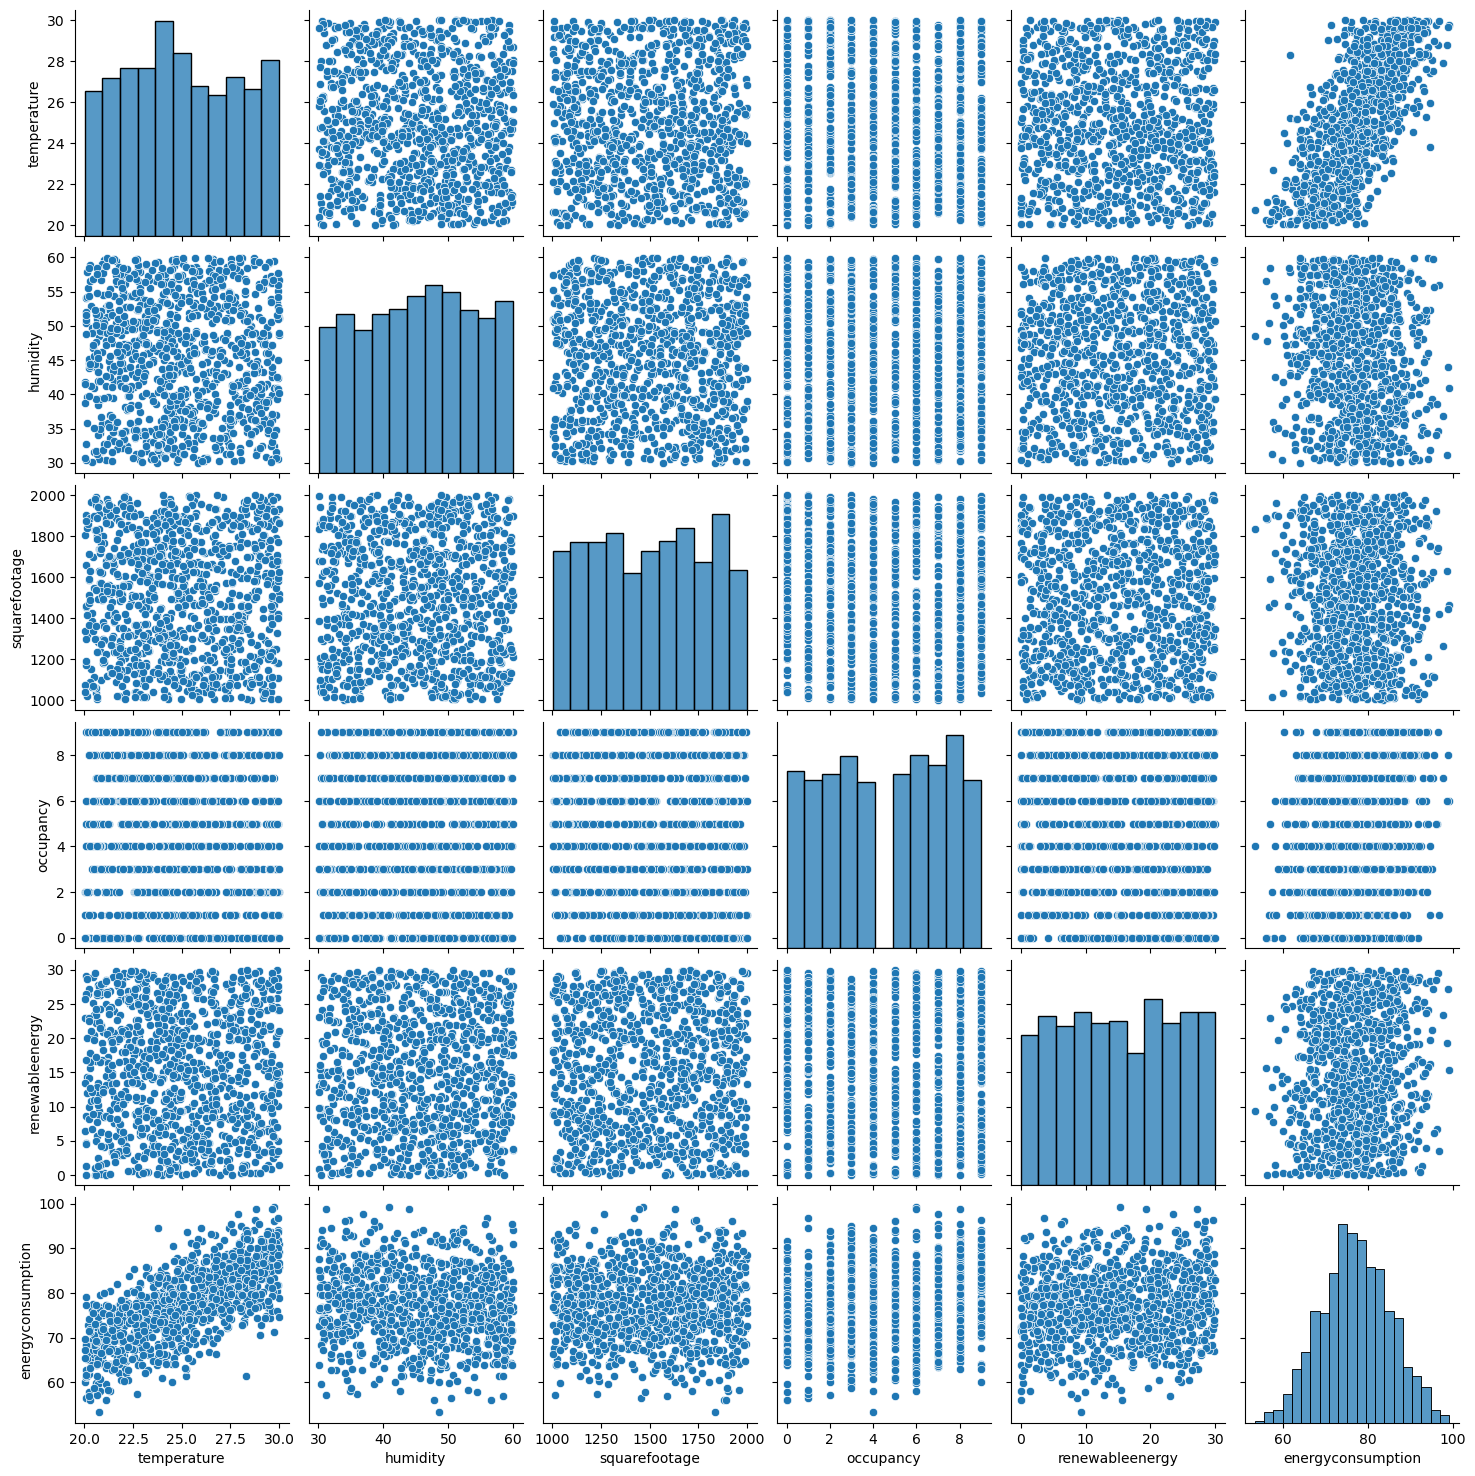

In [69]:
sns.pairplot(dataset[numerical_columns])

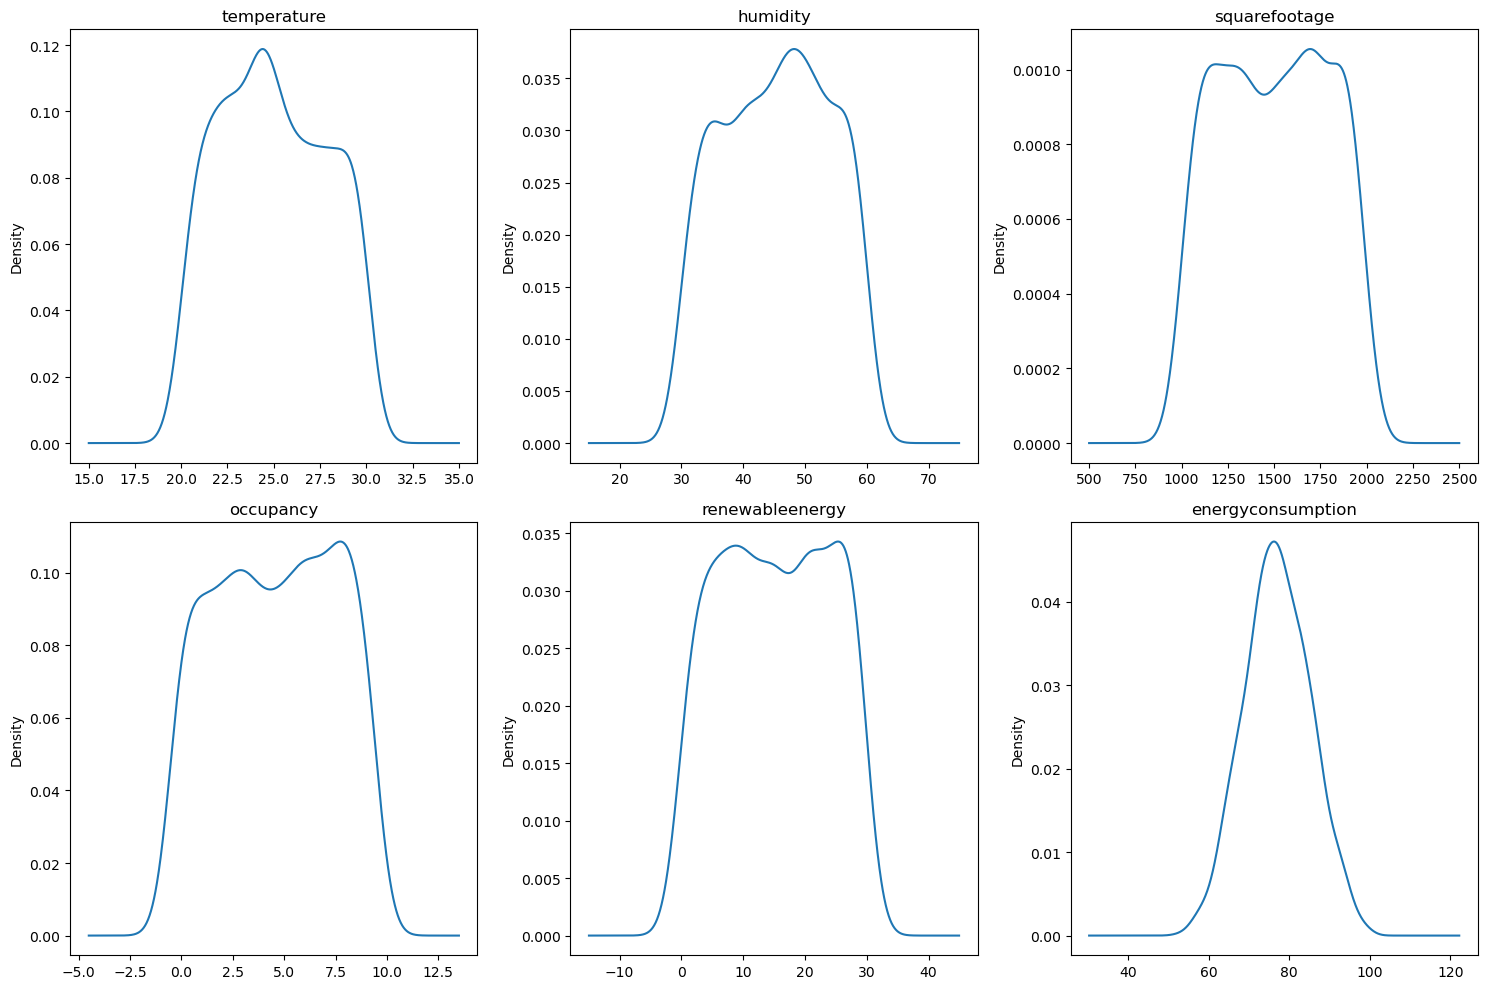

In [75]:
fig,ax = plt.subplots(2,3,figsize=(15,10))
row = col = 0
for n,i in enumerate(numerical_columns):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    dataset[i].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1

plt.tight_layout()
plt.show()

In [76]:
from scipy.stats import normaltest
for i in numerical_columns:
    print(f'{i}: {"Not Gaussian" if normaltest(dataset[i].values,)[1]<0.05 else "Gaussian"}  {normaltest(dataset[i].values)}')

temperature: Not Gaussian  NormaltestResult(statistic=409.514113574379, pvalue=1.1888857087924296e-89)
humidity: Not Gaussian  NormaltestResult(statistic=459.56794774005516, pvalue=1.6072673348268969e-100)
squarefootage: Not Gaussian  NormaltestResult(statistic=947.4494152544667, pvalue=1.8364264372749198e-206)
occupancy: Not Gaussian  NormaltestResult(statistic=982.9548688023133, pvalue=3.5814777678961682e-214)
renewableenergy: Not Gaussian  NormaltestResult(statistic=871.022416686055, pvalue=7.242448398673855e-190)
energyconsumption: Gaussian  NormaltestResult(statistic=5.1025853091906175, pvalue=0.07798079858419782)


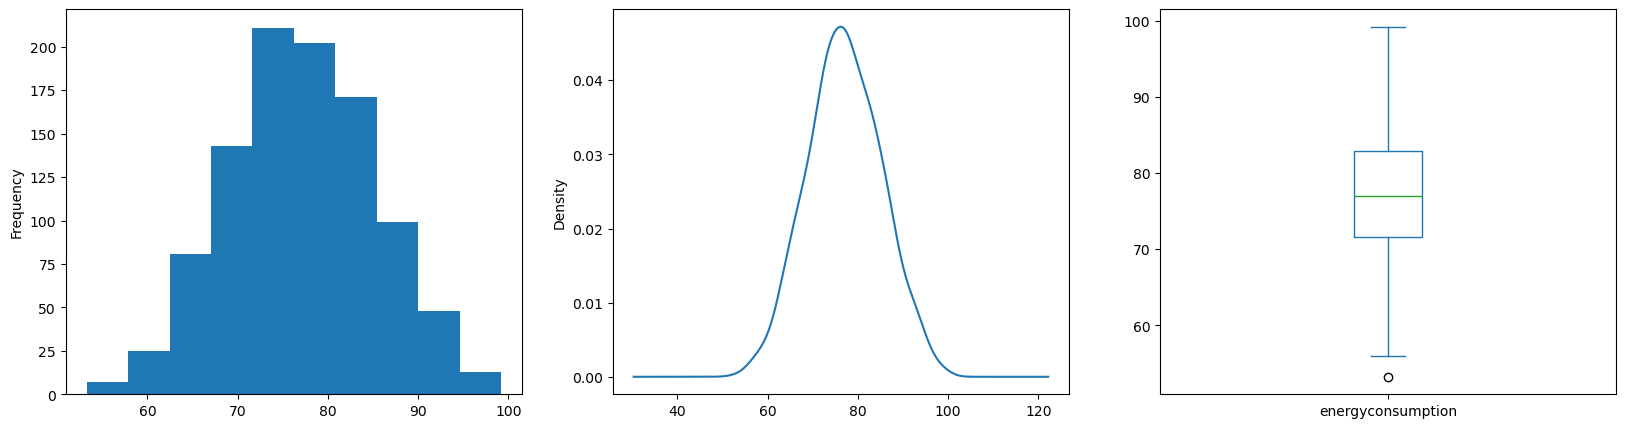

energyconsumption: Gaussian  NormaltestResult(statistic=5.1025853091906175, pvalue=0.07798079858419782)


In [77]:
target = 'energyconsumption'
fig,ax = plt.subplots(1,3,figsize=(20,5))
dataset[target].plot(kind="hist",ax=ax[0])
dataset[target].plot(kind="kde",ax=ax[1])
dataset[target].plot(kind="box",ax=ax[2])
plt.show()
print(f'{target}: {"Not Gaussian" if normaltest(dataset[target].values,)[1]<0.05 else "Gaussian"}  {normaltest(dataset[target].values)}')

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='EnergyConsumption', data=dataset)
plt.title('Energy Consumption over Time (Hour of Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Consumption')
plt.show()

<Axes: xlabel='hvacusage', ylabel='energyconsumption'>

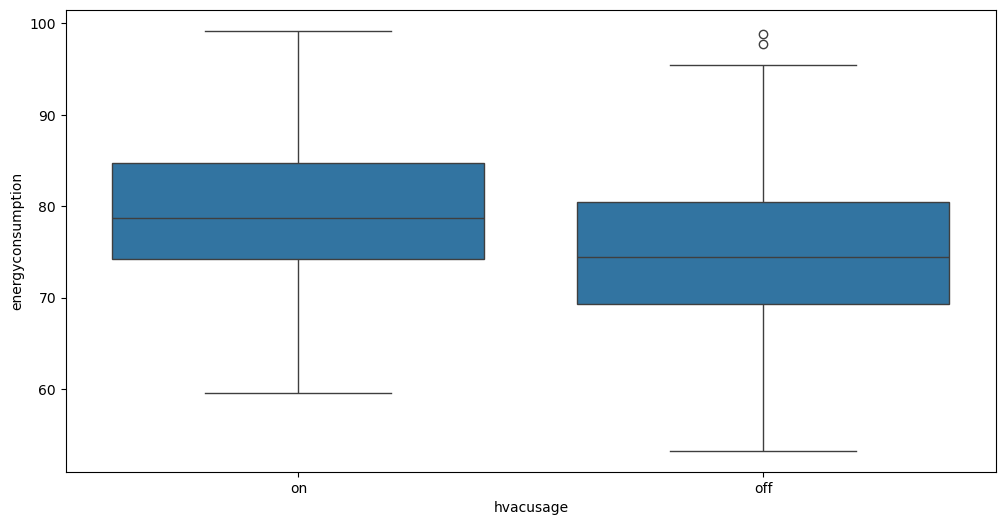

In [78]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['hvacusage'], y=dataset['energyconsumption'])

<Axes: xlabel='lightingusage', ylabel='energyconsumption'>

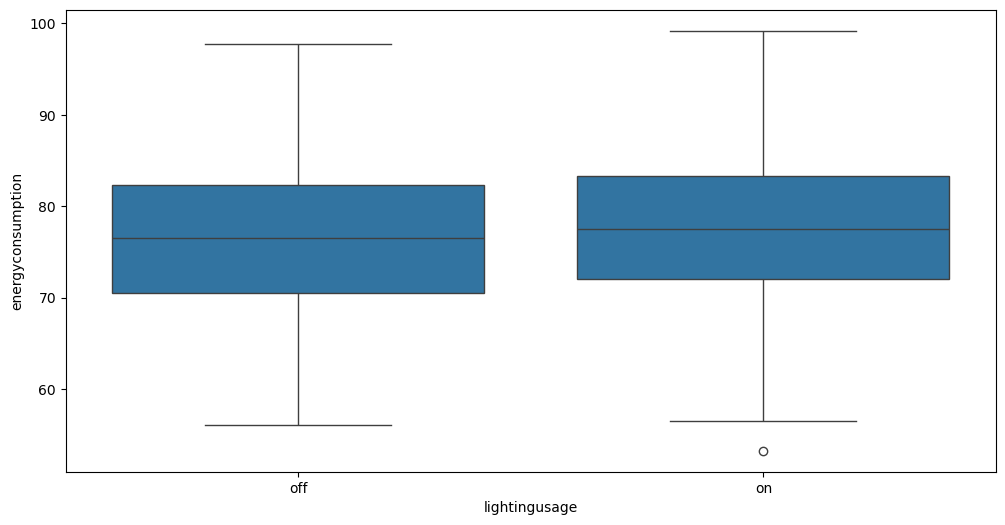

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['lightingusage'], y=dataset['energyconsumption'])

<Axes: xlabel='dayofweek', ylabel='energyconsumption'>

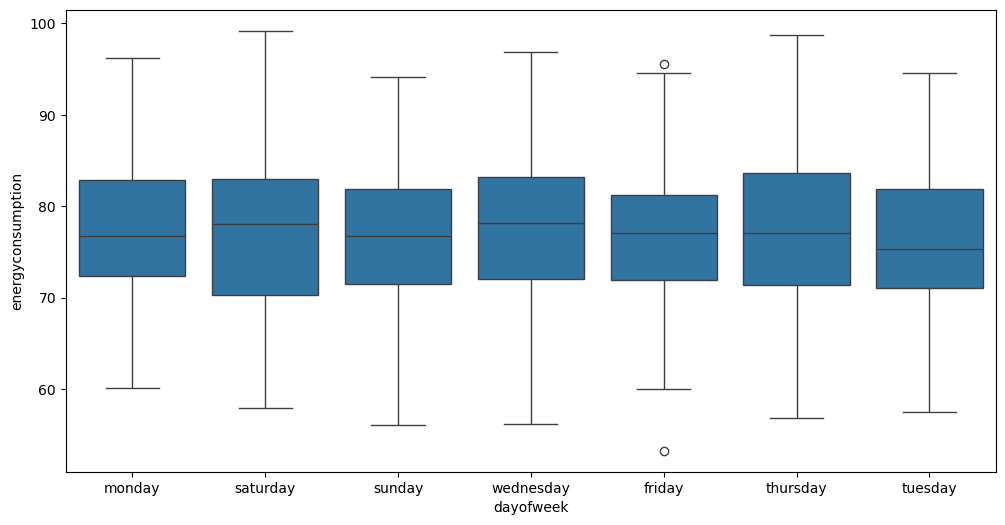

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['dayofweek'], y=dataset['energyconsumption'])

<Axes: xlabel='holiday', ylabel='energyconsumption'>

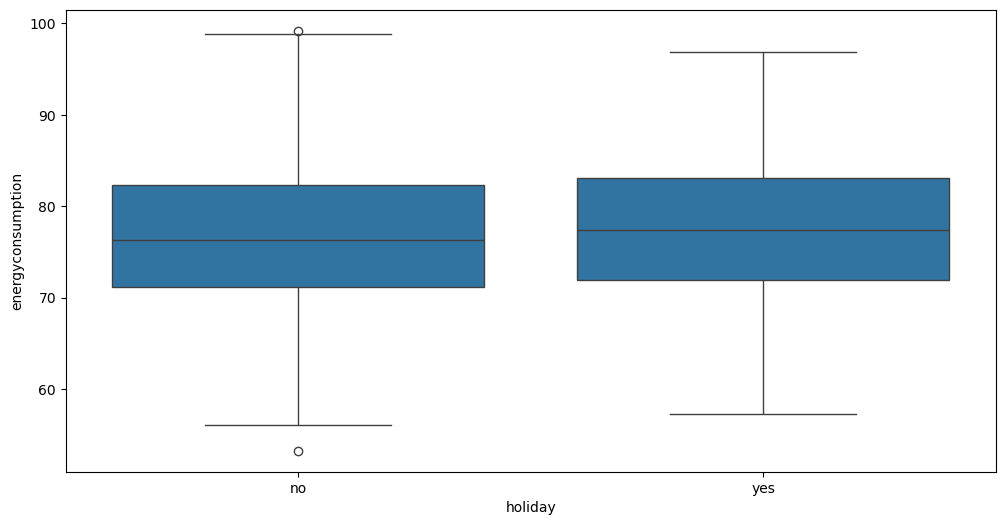

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['holiday'], y=dataset['energyconsumption'])

<Axes: xlabel='month', ylabel='energyconsumption'>

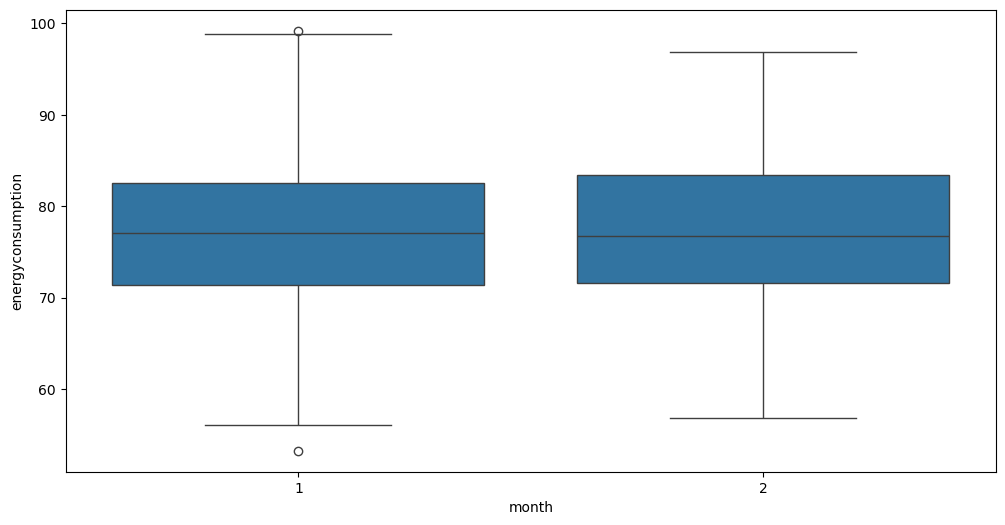

In [82]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['month'], y=dataset['energyconsumption'])

<Axes: xlabel='day', ylabel='energyconsumption'>

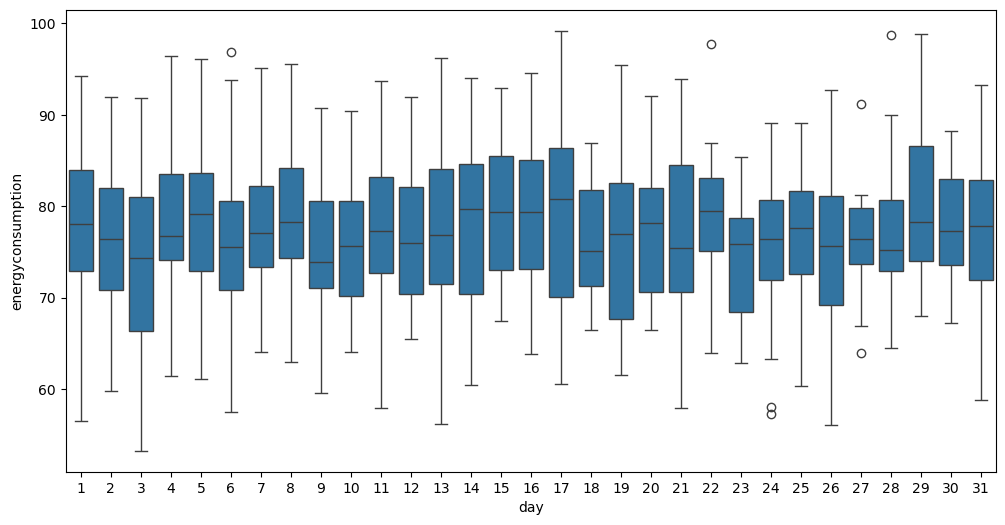

In [83]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['day'], y=dataset['energyconsumption'])

<Axes: xlabel='hour', ylabel='energyconsumption'>

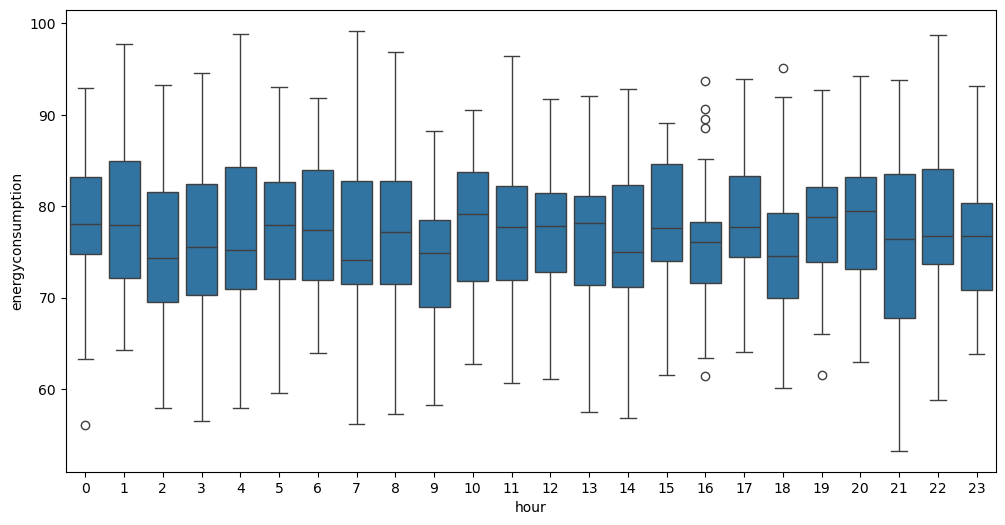

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['hour'], y=dataset['energyconsumption'])

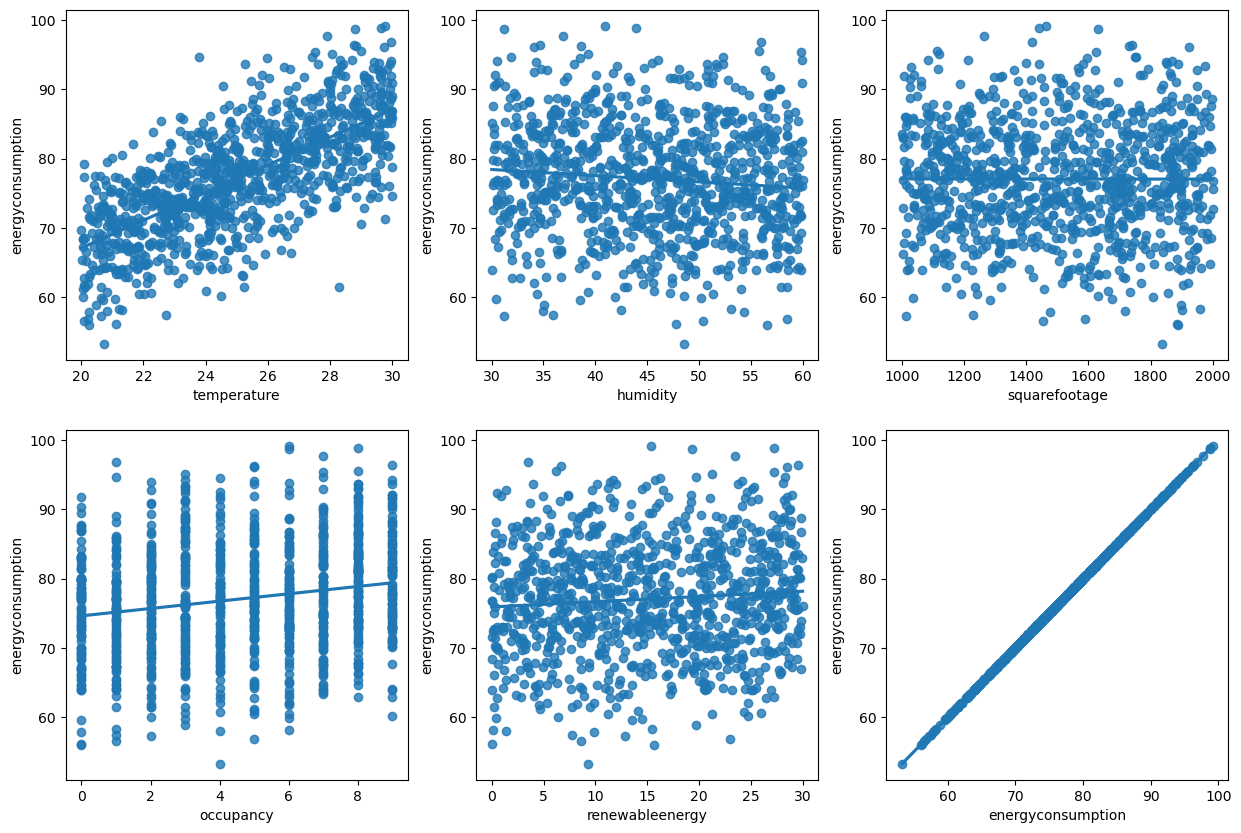

In [85]:
fig,ax = plt.subplots(2,3,figsize=(15,10))
row = col = 0
for n,i in enumerate(numerical_columns):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.regplot(x=i,y="energyconsumption",data=dataset,ax=ax[row,col],ci=False)
    col += 1

#### Saving final dataset as CSV:

In [86]:
dataset.head()

,temperature,humidity,squarefootage,occupancy,hvacusage,lightingusage,renewableenergy,dayofweek,holiday,energyconsumption,month,day,hour
0,25.139433,43.431581,1565.693999,5,on,off,2.774699,monday,no,75.364373,1,1,0
1,27.731651,54.225919,1411.064918,1,on,on,21.831384,saturday,no,83.401855,1,1,1
2,28.704277,58.907658,1755.715009,2,off,off,6.764672,sunday,no,78.270888,1,1,2
3,20.080469,50.371637,1452.316318,1,off,on,8.623447,wednesday,no,56.519850,1,1,3
4,23.097359,51.401421,1094.130359,9,on,off,3.071969,friday,no,70.811732,1,1,4


In [87]:
dataset.to_csv('./datasets/energy_consumption_processed.csv', index=False)